In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Data Analyst/JAV idols/data

/content/drive/My Drive/Data Analyst/JAV idols/data


In [3]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Import plotly library
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
data = pd.read_csv('./cleaned_data.csv')

In [ ]:
data.head()

,Name,Favorite,Year_of_birth,Blood_type,Hometown,Height,Hobby,Special_skill,Breast,Waist,Hip
0,Syunka Ayami,1022.0,1993.0,O Type,Tokyo,154.0,Cafe Tour,NaN,88.0,58.0,83.0
1,Tsukasa Aoi,824.0,1990.0,O Type,koube city,163.0,Jogging; Listening to jazz music; Watching com...,"Alt Saz, Piano, Moncycle, Sence cat person or ...",88.0,58.0,86.0
2,Yuma Asami,713.0,1987.0,AB Type,tokyo,158.0,NaN,"English conversation, a piano performance",96.0,58.0,88.0
3,Nozomi Aso,688.0,1988.0,A Type,Tokyo,170.0,"Yoga, piano",NaN,88.0,58.0,89.0
4,Kirara Asuka,640.0,1988.0,A Type,tokyo,162.0,EATING,bridge,90.0,58.0,83.0


In [ ]:
for col in ['Favorite', 'Year_of_birth', 'Height', 'Breast', 'Waist', 'Hip']:
    data[col] = data[col].astype('Int16')

## I. Top 15 most favorite JAV idols

In [ ]:
favorite_df = data[['Name', 'Favorite']].dropna()
top15_favorite = favorite_df.sort_values(by='Favorite', ascending=False)[:15]

In [ ]:
fig = go.Figure(go.Bar(
            x=top15_favorite['Favorite'][::-1],
            y=top15_favorite['Name'][::-1],
            orientation='h'))
fig.update_layout(
    title={
        'text': "Top 15 most favorite JAV idols",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

## II. Distribution of year of birth

In [ ]:
data.loc[data['Year_of_birth'] > 2005, 'Year_of_birth'] = np.nan

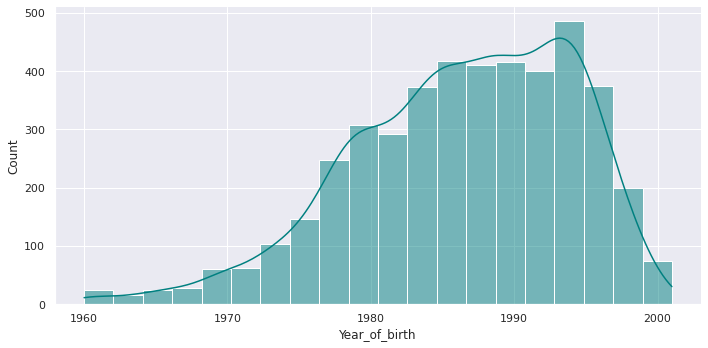

In [ ]:
sns.set_theme()
sns.displot(data['Year_of_birth'].dropna().astype(float), kde=True, bins=20, height=5, aspect=2, color='teal')

In [ ]:
data[data['Year_of_birth'] == 2001]

,Name,Favorite,Year_of_birth,Blood_type,Hometown,Height,Hobby,Special_skill,Breast,Waist,Hip
1515,Kanon Ichikawa,19,2001,- Type,NaN,141,NaN,NaN,80,55,82
2390,Mai Okino,4,2001,- Type,NaN,155,NaN,NaN,<NA>,60,87
2807,Mari Kagami,23,2001,- Type,chiba,162,AV鑑賞,イラマチオ,82,60,88
5290,Yuzu Shirakawa,22,2001,- Type,ibaraki,148,NaN,UFOキャッチャー,82,57,82
6430,エレナ 武田,<NA>,2001,A Type,Shizuoka Prefecture,<NA>,NaN,NaN,<NA>,<NA>,<NA>
10065,Shino Minami,13,2001,- Type,NaN,<NA>,NaN,NaN,84,58,58


In [ ]:
go.Figure(data=[go.Histogram(x=data['Hip'].dropna())])


In [ ]:
data['Hip'].dropna().describe()

count    6938.000000
mean       86.782214
std         4.427591
min        57.000000
25%        84.000000
50%        86.000000
75%        88.000000
max       120.000000
Name: Hip, dtype: float64

## III. Breast, waist and hip

In [ ]:
# Remove the outliers
data.loc[data['Breast'] > 120, 'Breast'] = np.nan
data.loc[data['Waist'] > 80, 'Waist'] = np.nan
data.loc[data['Hip'] < 57, 'Hip'] = np.nan
data.loc[data['Hip'] > 120, 'Hip'] = np.nan
data.loc[data['Height'] < 100, 'Height'] = np.nan

In [ ]:
# Create a new DataFrame to easily visualize for all 3 types of size
body_df = pd.DataFrame(columns=['Size', 'Type'])
for i in range(len(data)):
    body_df.loc[len(body_df)] = [data.loc[i, 'Breast'], 'Breast']
    body_df.loc[len(body_df)] = [data.loc[i, 'Waist'], 'Waist']
    body_df.loc[len(body_df)] = [data.loc[i, 'Hip'], 'Hip']

body_df['Size'] = body_df['Size'].dropna().astype(float)

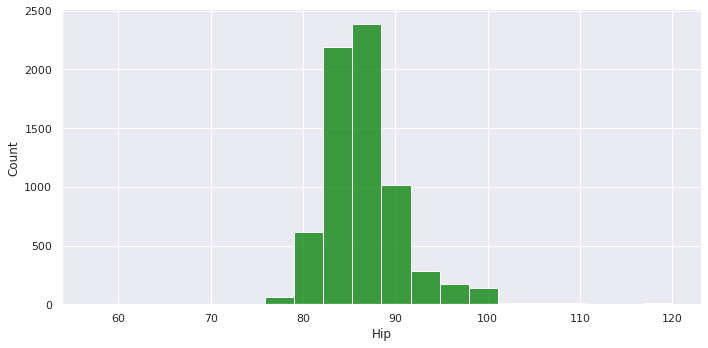

In [ ]:
sns.displot(data['Hip'].dropna().astype(float), bins=20, height=5, aspect=2, color='green')

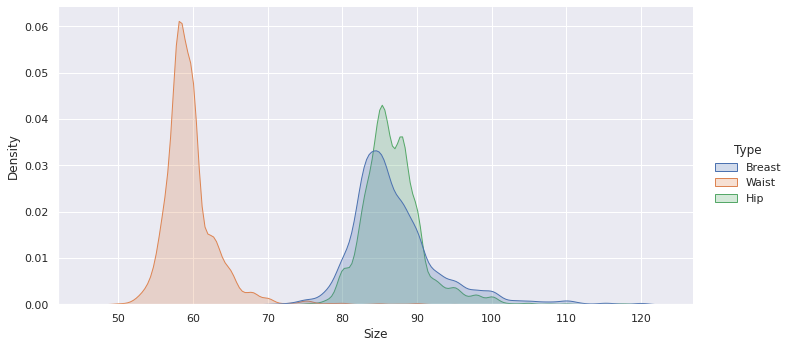

In [ ]:
ax = sns.displot(body_df, x="Size", hue="Type", kind='kde', fill=True, height=5, aspect=2)
ax.set_titles('3 vòng kết hợp')

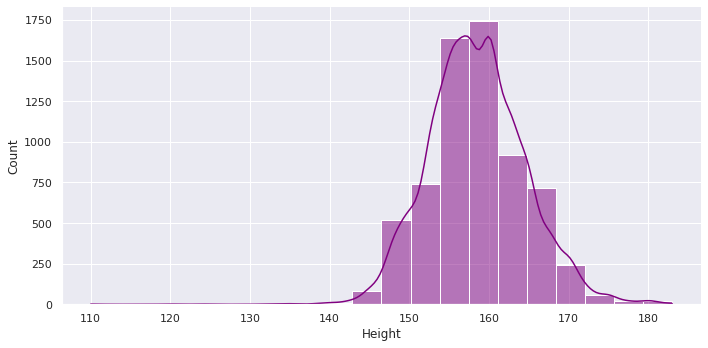

In [ ]:
# Histogram of height
sns.displot(data['Height'].dropna().astype(float), kde=True, bins=20, height=5, aspect=2, color='purple')

## IV.Hobby and Special skills

In [ ]:
# Import necessary libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [ ]:
# Join all hobbies and special skills
hobbies = ' '.join(data['Hobby'].dropna()).lower()
special_skill = ' '.join(data['Special_skill'].dropna()).lower()

In [ ]:
# Tokenize
hobbies = word_tokenize(hobbies)
special_skill = word_tokenize(special_skill)

In [ ]:
# Remove punctuation
import string
hobbies = [hobby for hobby in hobbies if hobby not in string.punctuation]
hobbies = [skill for skill in special_skill if skill not in string.punctuation]

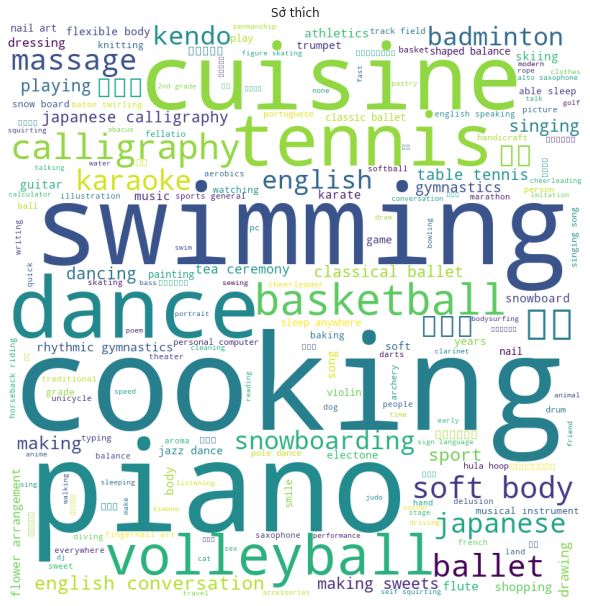

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(hobbies)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Sở thích')
  
plt.show() 

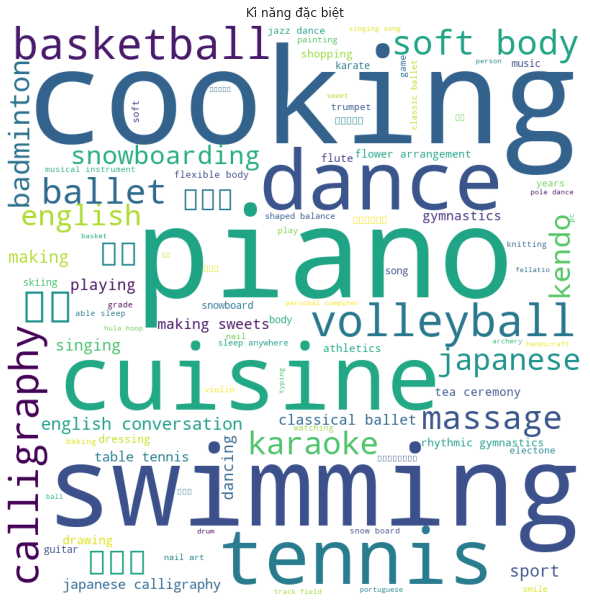

In [ ]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(special_skill)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Kĩ năng đặc biệt')
  
plt.show() 

## V. Google Trend for keyword "jav"

In [ ]:
!pip install pytrends
!pip install geopy==2.0.0

In [ ]:
# Get the data for keyword "jav" from Google Trend 
from pytrends.request import TrendReq

pytrends = TrendReq(tz=360)
keyword = 'jav'
pytrends.build_payload([keyword], cat=0, timeframe='today 5-y', geo='', gprop='')

regions = pytrends.interest_by_region(resolution='COUNTRY', inc_geo_code=True)
regions.rename(columns={keyword : 'search_volume'}, inplace=True)

In [ ]:
# Fix name
regions.rename(index={'United States': 'United States of America',
                      'Myanmar (Burma)': 'Myanmar',
                      'French Southern and Antarctic Lands': 'French Southern Territories',
                      'The Bahamas': 'Bahamas',
                      'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
                      'Ivory Coast': 'Côte d’Ivoire',
                      'Democratic Republic of the Congo': 'Congo - Kinshasa',
                      'Republic of the Congo': 'Congo - Brazzaville',
                      'Czech Republic': 'Czechia',
                      'Falkland Islands': 'Falkland Islands (Islas Malvinas)',
                      'Guinea Bissau': 'Guinea-Bissau',
                      'Macedonia': 'North Macedonia',
                      'Republic of Serbia': 'Serbia',
                      'East Timor': 'Timor-Leste',
                      'Trinidad and Tobago': 'Trinidad & Tobago',
                      'United Republic of Tanzania': 'Tanzania'}, inplace=True)

In [ ]:
# Top 10 regions
regions.sort_values(by=['search_volume'], ascending=False)[:10]

,geoCode,search_volume
geoName,,
Vietnam,VN,100
Cambodia,KH,81
Laos,LA,67
Myanmar,MM,61
Indonesia,ID,60
South Korea,KR,57
Singapore,SG,50
Thailand,TH,47
Malaysia,MY,31


In [ ]:
import folium

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'

m = folium.Map(location=[100, 0], zoom_start=1.5)

folium.Choropleth(
    geo_data=url,
    name='choropleth',
  data=regions.reset_index(),    
  columns=['geoName', 'search_volume'],
    key_on='properties.name',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Search volume',
    fill_color ='YlGnBu',
    nan_fill_color='#FFFFCC'
    ).add_to(m)

folium.LayerControl().add_to(m)

m

Standardize the address by geopy library

In [ ]:
from random import randint

In [ ]:
# Create a object of Nominatim
from geopy.geocoders import Nominatim
user_agent = 'user_me_{}'.format(randint(10000,99999))
geolocator = Nominatim(user_agent=user_agent)

In [ ]:
# Function to get location information
def get_location(input_address):
    location = geolocator.geocode(input_address, language='en')
    return location.latitude, location.longitude, location.address

In [ ]:
# All unique addresses
list_address = data['Hometown'].dropna().unique().tolist()

In [ ]:
# A dictionary to standardize addresses
dict_address = {}
for address in list_address:
    try:
        dict_address[address] = list(get_location(address))
    except:
        dict_address[address] = [np.nan, np.nan, np.nan]

In [ ]:
# Drop na values of hometown
data.dropna(subset=['Hometown'], inplace=True)

In [ ]:
# Convert data cols
data['Latitude'] = data['Hometown'].apply(lambda x: dict_address[x][0])
data['Longitude'] = data['Hometown'].apply(lambda x: dict_address[x][1])
data['Address'] = data['Hometown'].apply(lambda x: dict_address[x][2])

In [ ]:
df_location = data[['Latitude', 'Longitude', 'Address']]
df_location.reset_index(inplace=True, drop=True)

# VI. Mapping hometowns

In [5]:
!pip install geopandas

     |████████████████████████████████| 972kB 13.0MB/s 
     |████████████████████████████████| 14.8MB 208kB/s 
     |████████████████████████████████| 6.5MB 54.9MB/s 


In [6]:
# Read file csv
location_df = pd.read_csv('./location.csv')
population_df = pd.read_csv('./covid_jpn_metadata.csv')

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [8]:
# Read map of japan to make a map visualization
map_df = gpd.read_file('./japan-prefecture-boundaries.shp')
map_df.head()

,prefecture,geometry
0,Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ..."
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ..."
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ..."
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ..."
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ..."


In [9]:
# Clean the population dataframe to remain only female population
population_df = population_df[population_df['Item'] == 'Female']
population_df = population_df[['Prefecture', 'Value']]
population_df.rename(columns={'Value':'Female_population'}, inplace=True)
population_df.reset_index(drop=True, inplace=True)
population_df.head()

,Prefecture,Female_population
0,Hokkaido,2814
1,Aomori,678
2,Iwate,651
3,Miyagi,1188
4,Akita,528


In [10]:
# merge map df and population df
merged = map_df.merge(population_df, how='left', left_on="prefecture", right_on="Prefecture")
merged.drop(columns=['Prefecture'], inplace=True)
merged.head()

,prefecture,geometry,Female_population
0,Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ...",3761
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...",528
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...",678
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...",3143
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...",719


In [11]:
location_df.head()

,Latitude,Longitude,Address
0,35.682839,139.759455,"Tokyo, Japan"
1,34.685797,133.896521,"Koube, Kita Ward, Okayama, Okayama Prefecture,..."
2,35.682839,139.759455,"Tokyo, Japan"
3,35.682839,139.759455,"Tokyo, Japan"
4,35.682839,139.759455,"Tokyo, Japan"


In [12]:
# Below is cleaning location df to make a groupby count df
location_df.dropna(inplace=True)
location_df.reset_index(inplace=True, drop=True)

In [13]:
tmp_list = []
for i in range(len(location_df)):
    if 'Japan' not in location_df.loc[i, 'Address']:
        tmp_list.append(i)
location_df.drop(tmp_list, inplace=True)
location_df.reset_index(inplace=True, drop=True)

In [14]:
location_df['Prefecture'] = np.nan

for i in range(len(location_df)):
    if 'Tokyo' in location_df.loc[i, 'Address']:
        location_df.loc[i, 'Prefecture'] = 'Tokyo'
    elif 'Hachioji' in location_df.loc[i, 'Address']:
        location_df.loc[i, 'Prefecture'] = 'Tokyo'
    elif 'Saitama' in location_df.loc[i, 'Address']:
        location_df.loc[i, 'Prefecture'] = 'Saitama'
    else:
        for element in location_df.loc[i, 'Address'].split(', '):
            if 'Prefecture' in element:
                location_df.loc[i, 'Prefecture'] = element.replace(' Prefecture', '')

In [15]:
# the groupby count df
count_prefecture = location_df.groupby(['Prefecture']).size().reset_index(name='counts')
count_prefecture[:5]

,Prefecture,counts
0,Aichi,13
1,Akita,49
2,Aomori,25
3,Chiba,185
4,Ehime,2


In [16]:
# join the geodataframe with the count df
merged = merged.merge(count_prefecture, how='left', left_on="prefecture", right_on="Prefecture")
merged.drop(columns=['Prefecture'], inplace=True)
merged.head()

,prefecture,geometry,Female_population,counts
0,Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ...",3761,13
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...",528,49
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...",678,25
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...",3143,185
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...",719,2


In [17]:
# Calculation the percentage of JAV idols on female population of every prefecture
merged['Percentage'] = merged['counts']/merged['Female_population'].astype(int)
merged.head()

,prefecture,geometry,Female_population,counts,Percentage
0,Aichi,"MULTIPOLYGON (((137.09523 34.65330, 137.09546 ...",3761,13,0.003457
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...",528,49,0.092803
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...",678,25,0.036873
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...",3143,185,0.058861
4,Ehime,"MULTIPOLYGON (((132.55859 32.91224, 132.55904 ...",719,2,0.002782


In [18]:
# Top 10
merged.sort_values(by=['Percentage'], ascending=False)[:10]

,prefecture,geometry,Female_population,counts,Percentage
40,Tokyo,"MULTIPOLYGON (((139.74057 35.54160, 139.74005 ...",6964,1430,0.205342
18,Kanagawa,"MULTIPOLYGON (((139.61588 35.13719, 139.61618 ...",4590,538,0.117211
1,Akita,"MULTIPOLYGON (((139.55725 39.20330, 139.55765 ...",528,49,0.092803
3,Chiba,"MULTIPOLYGON (((139.82488 34.98967, 139.82434 ...",3143,185,0.058861
46,Yamanashi,"POLYGON ((138.46316 35.90044, 138.47263 35.894...",421,22,0.052257
21,Kyoto,"POLYGON ((135.22284 35.77890, 135.22337 35.778...",1357,67,0.049374
37,Shizuoka,"MULTIPOLYGON (((141.46085 24.24579, 141.46115 ...",1866,82,0.043944
11,Hokkaido,"MULTIPOLYGON (((140.09169 41.41886, 140.09129 ...",2814,121,0.042999
9,Gunma,"POLYGON ((139.18037 36.98150, 139.17883 36.971...",992,40,0.040323
2,Aomori,"MULTIPOLYGON (((141.39860 40.92472, 141.39806 ...",678,25,0.036873


In [20]:
merged['Percentage'] = merged['Percentage'].apply(lambda x: x**(1/2))

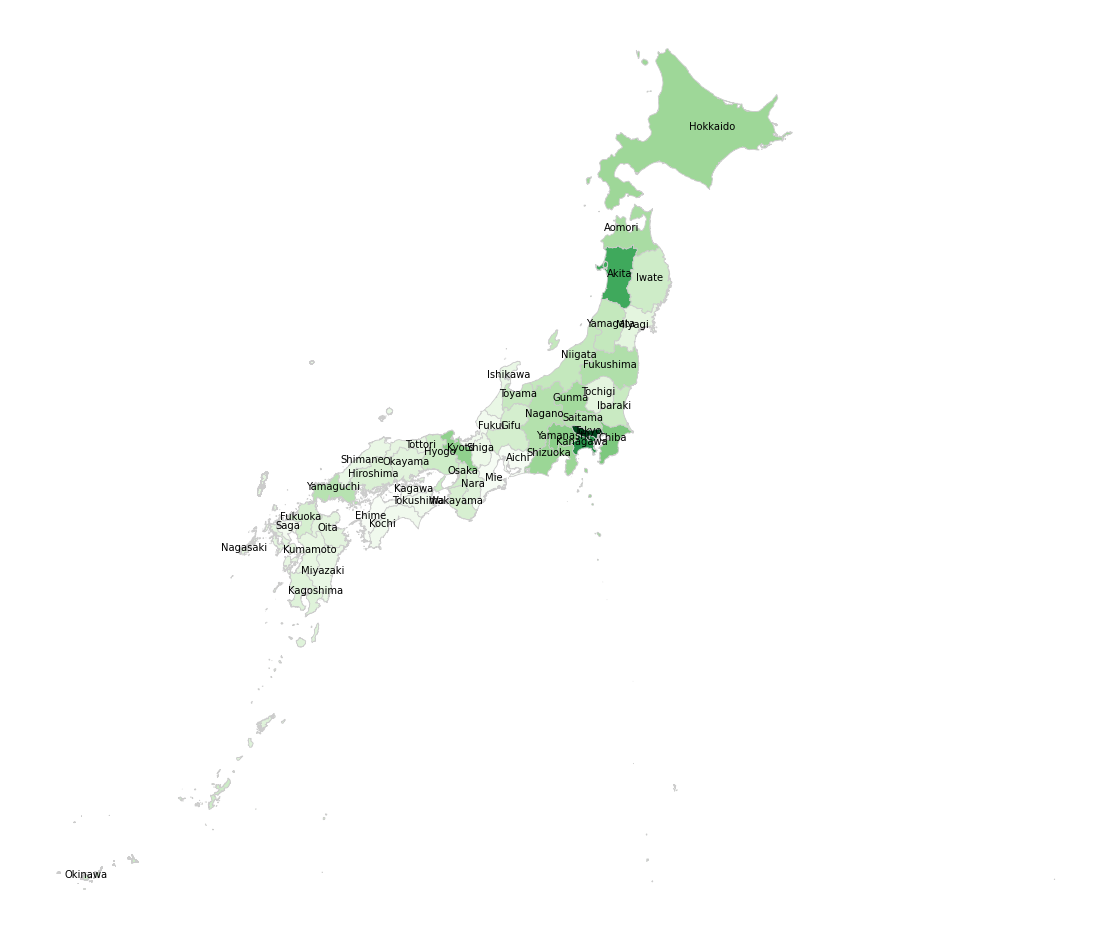

In [21]:
# set the value column that will be visualised
variable = 'Percentage'

# set the range for the choropleth values
vmin, vmax = 0, 50

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(50, 17))

# remove the axis
ax.axis('off')

# add a title and annotation
# ax.set_title('# of JAV idols were born', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
#fig.colorbar(sm)

# create map
merged.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8')

# Add Labels
merged['coords'] = merged['geometry'].apply(lambda x: x.representative_point().coords[:])
merged['coords'] = [coords[0] for coords in merged['coords']]
for idx, row in merged.iterrows():
    plt.annotate(s=row['prefecture'], xy=row['coords'],horizontalalignment='center')